In [31]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msn 
from sklearn.preprocessing import LabelEncoder

In [32]:
df = pd.read_csv('main.csv')
print(df.shape)
df.head()
df.info()

(10569, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10569 entries, 0 to 10568
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                10399 non-null  object 
 1   author_type           10396 non-null  object 
 2   url                   10566 non-null  object 
 3   location              10162 non-null  object 
 4   deal_type             10569 non-null  object 
 5   accommodation_type    10569 non-null  object 
 6   floor                 10569 non-null  float64
 7   floors_count          10569 non-null  float64
 8   rooms_count           10569 non-null  float64
 9   total_meters          10569 non-null  object 
 10  price                 10536 non-null  float64
 11  year_of_construction  10569 non-null  object 
 12  object_type           10566 non-null  float64
 13  house_material_type   10566 non-null  object 
 14  heating_type          10566 non-null  float64
 15  finish_

In [33]:
df = df.replace([-1,-1.0,'-1','-1.0'], np.nan)

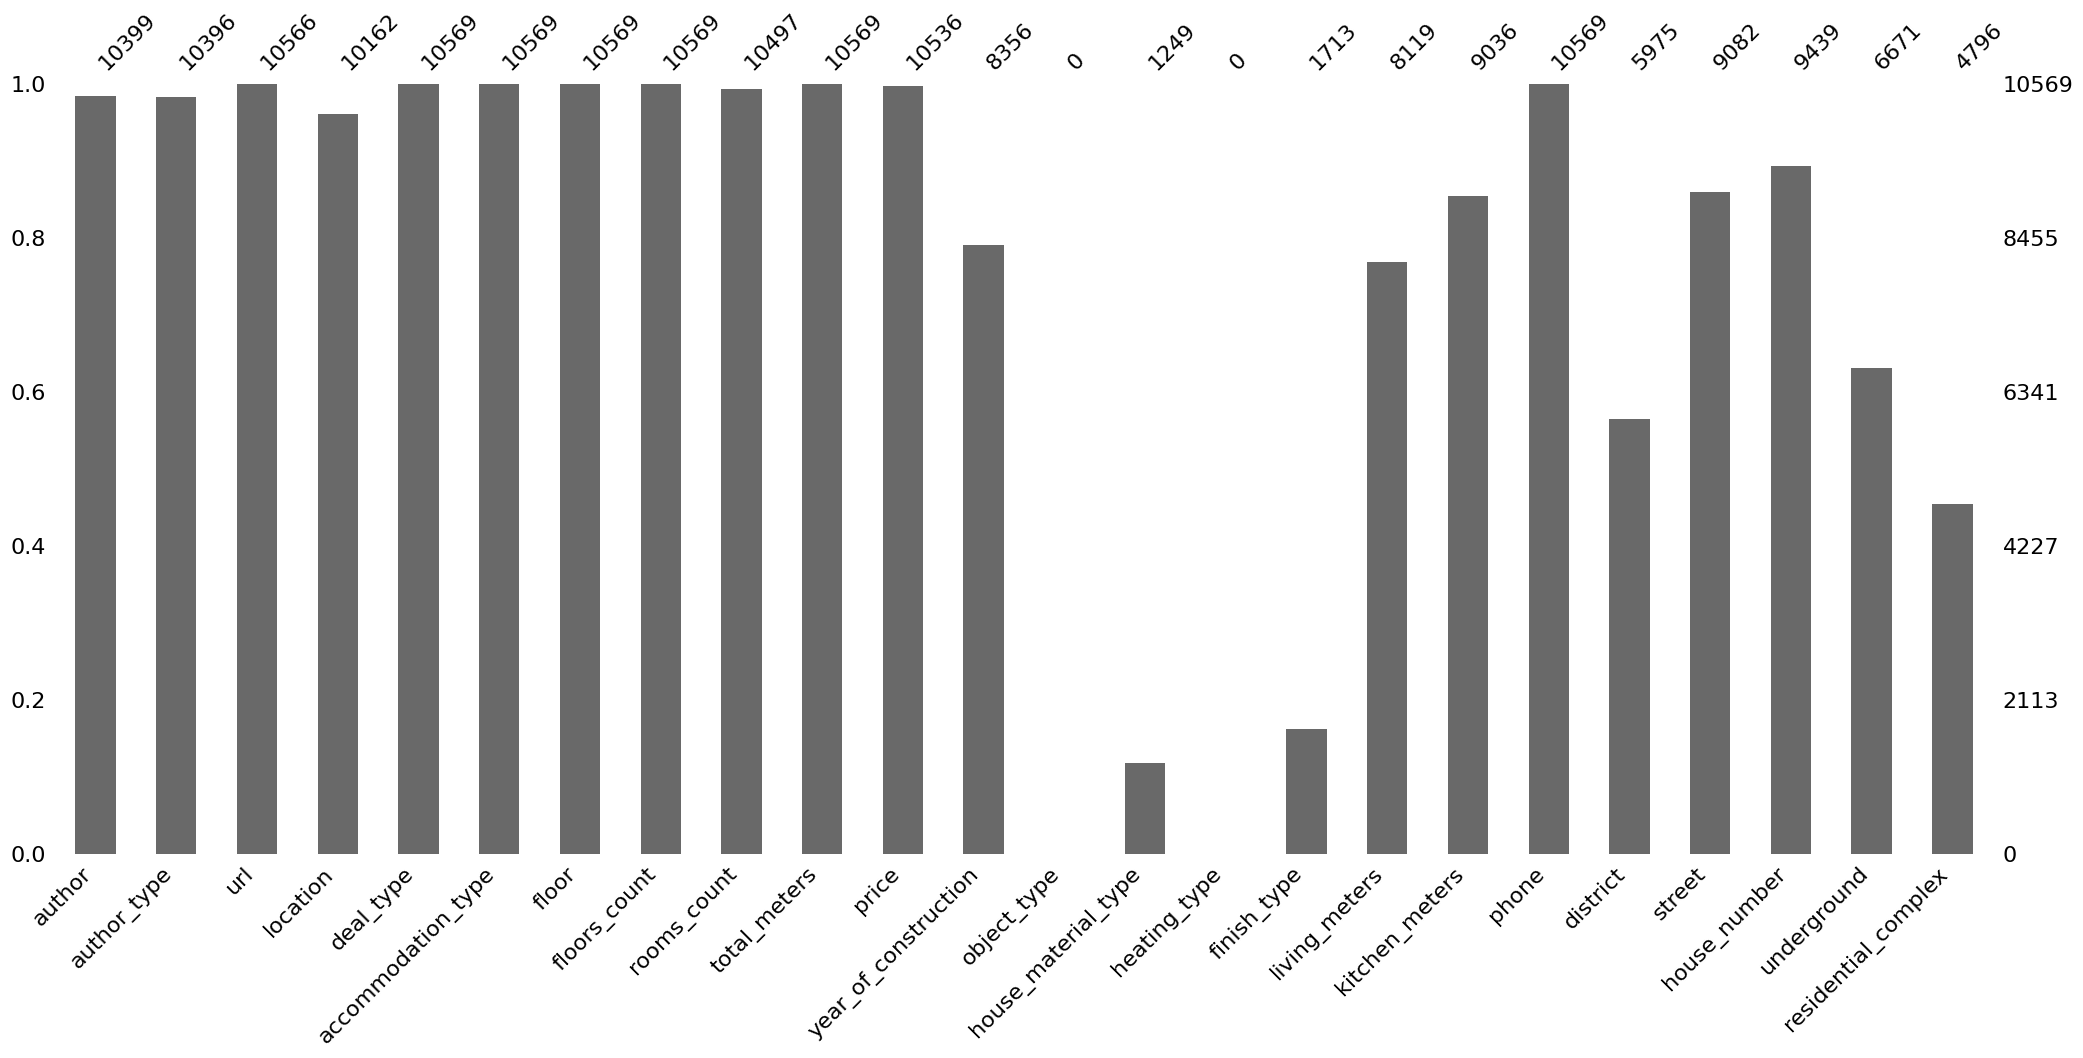

In [34]:
plt.figure(figsize=(1,1))
msn.bar(df)
plt.show()

In [35]:
float_list = ['floor', 'floors_count', 'rooms_count', 
              'price', 'heating_type', 'year_of_construction']

for var in float_list:
    df[var] = pd.to_numeric(df[var], errors='coerce').astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10569 entries, 0 to 10568
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                10399 non-null  object 
 1   author_type           10396 non-null  object 
 2   url                   10566 non-null  object 
 3   location              10162 non-null  object 
 4   deal_type             10569 non-null  object 
 5   accommodation_type    10569 non-null  object 
 6   floor                 10569 non-null  Int64  
 7   floors_count          10569 non-null  Int64  
 8   rooms_count           10497 non-null  Int64  
 9   total_meters          10569 non-null  object 
 10  price                 10536 non-null  Int64  
 11  year_of_construction  8286 non-null   Int64  
 12  object_type           0 non-null      float64
 13  house_material_type   1249 non-null   object 
 14  heating_type          0 non-null      Int64  
 15  finish_type        

In [36]:
df['living_meters'] = pd.to_numeric(
    df['living_meters'].str.replace(',','.').apply(lambda x: x[:-3] if pd.notna(x) else np.nan),
    errors='coerce').astype('float64')


In [37]:
df['kitchen_meters'] = pd.to_numeric(
    df['kitchen_meters'].str.replace(',','.').apply(lambda x: x[:-3] if pd.notna(x) else np.nan),
    errors='coerce').astype('float64')

In [38]:
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce').astype('float64')

In [39]:
df['district'] = df["district"].fillna(df['location'])

In [40]:
df['underground'] = df['underground'].fillna(df['location'])

In [41]:
df['year_of_construction'] = df['year_of_construction'].replace(["Напишите автору", "Подписаться на дом", "Позвоните автору", "Аукцион"], np.nan)
df = df.drop(df[df['year_of_construction'].isna() == True].index)
df['year_of_construction'] = df['year_of_construction'].fillna(df['year_of_construction'].median())
print(df.shape)

(8286, 24)


In [42]:
df['living_meters'] = df['living_meters'].fillna(df['total_meters'] - df['kitchen_meters'])

In [43]:
df = df.loc[df['living_meters'] > 5]
print(df['living_meters'].describe())

count    7426.000000
mean       40.086169
std        37.823741
min         5.400000
25%        18.600000
50%        29.600000
75%        45.275000
max       613.000000
Name: living_meters, dtype: float64


In [44]:
df = df.drop(df[df['rooms_count'].isnull() == True].index)

df = df.drop(df[df['location'].isnull() == True].index)

df = df.drop(df[df['price'].isnull() == True].index)

df = df.drop(df[df['author'].isnull() == True].index)

df = df.drop(df[df['kitchen_meters'].isnull() == True].index)

df = df.drop(df[df['total_meters'].isnull() == True].index)

In [45]:
df.isna().mean()*100

author                    0.000000
author_type               0.000000
url                       0.000000
location                  0.000000
deal_type                 0.000000
accommodation_type        0.000000
floor                     0.000000
floors_count              0.000000
rooms_count               0.000000
total_meters              0.000000
price                     0.000000
year_of_construction      0.000000
object_type             100.000000
house_material_type      88.367647
heating_type            100.000000
finish_type              84.441176
living_meters             0.000000
kitchen_meters            0.000000
phone                     0.000000
district                  0.000000
street                   13.764706
house_number              9.014706
underground               0.000000
residential_complex      55.000000
dtype: float64

In [46]:
useless_list = [
    'author_type',
    'deal_type',
    'accommodation_type',
    'object_type',
    'heating_type',
    'residential_complex',
    'street',
    'house_number',
    'house_material_type',
    'finish_type',
    'phone',
    'author',
    'url'
]

for var in useless_list:
    del df[var]

In [47]:
df.info()
df.isna().mean()*100
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6800 entries, 0 to 10568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6800 non-null   object 
 1   floor                 6800 non-null   Int64  
 2   floors_count          6800 non-null   Int64  
 3   rooms_count           6800 non-null   Int64  
 4   total_meters          6800 non-null   float64
 5   price                 6800 non-null   Int64  
 6   year_of_construction  6800 non-null   Int64  
 7   living_meters         6800 non-null   float64
 8   kitchen_meters        6800 non-null   float64
 9   district              6800 non-null   object 
 10  underground           6800 non-null   object 
dtypes: Int64(5), float64(3), object(3)
memory usage: 670.7+ KB


,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters
count,6800.0,6800.0,6800.0,6800.000000,6800.0,6800.0,6800.000000,6800.000000
mean,7.669853,14.142353,2.133235,65.962631,25234749.022647,2001.717794,40.468910,11.799985
std,6.905683,9.433788,1.215873,50.764438,67367022.129654,24.11898,37.970927,7.718654
min,1.0,1.0,1.0,12.700000,800000.0,1600.0,5.400000,1.000000
25%,3.0,7.0,1.0,38.000000,6300000.0,1982.0,18.900000,7.000000
50%,5.0,13.0,2.0,49.000000,9000000.0,2011.0,30.000000,10.000000
75%,11.0,18.0,3.0,72.925000,15500000.0,2021.0,45.800000,13.800000
max,82.0,95.0,5.0,663.000000,1392320000.0,2028.0,613.000000,103.900000


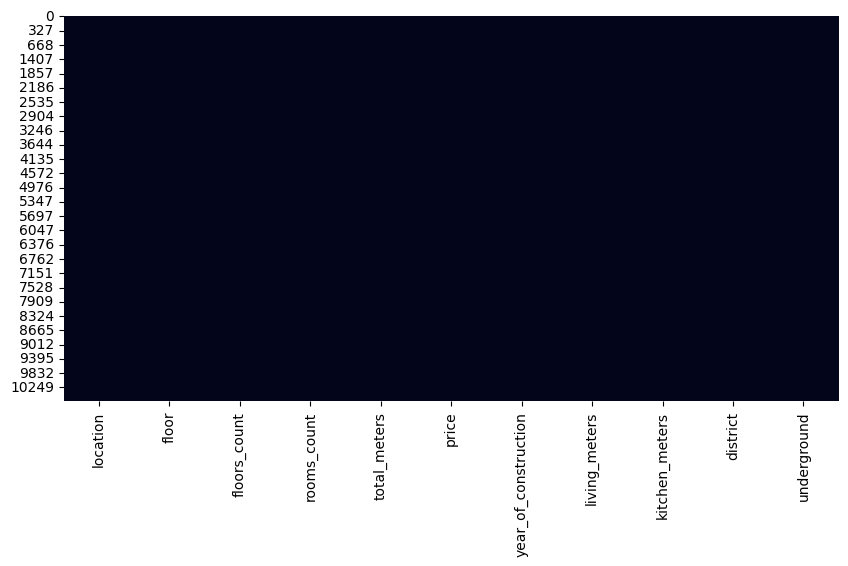

In [48]:
plt.figure(figsize=[10, 5])
sns.heatmap(df.isna(), cbar=False, ax = plt.axes())
plt.show() 

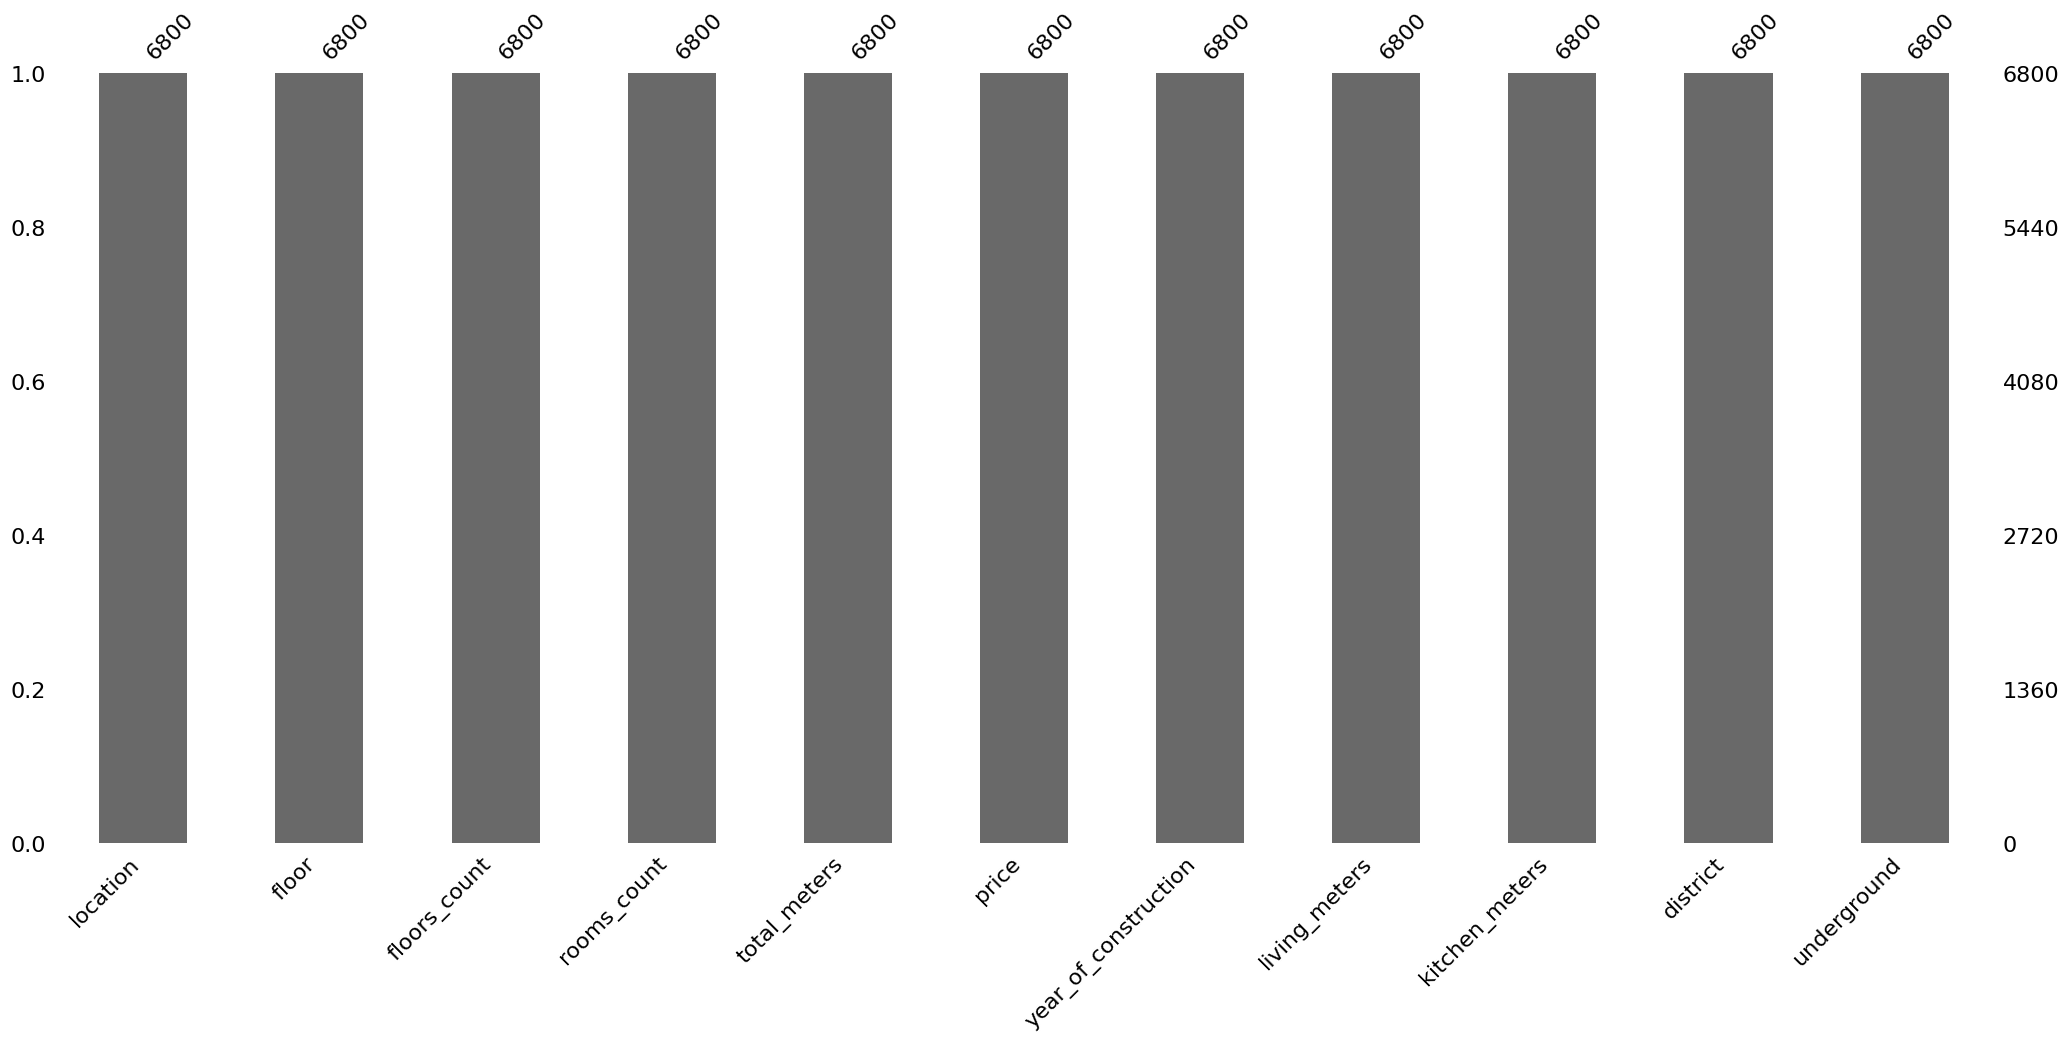

In [49]:

msn.bar(df)
plt.show()

In [50]:
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,Москва,5,7,1,34.6,9000000,1978,18.0,8.0,Северное Измайлово,Щёлковская
1,Москва,14,45,1,41.3,12800000,2026,20.0,11.0,Нижегородский,Нижегородская
2,Москва,10,12,1,34.4,19372498,2026,11.8,11.7,Преображенское,Преображенская площадь
6,Москва,13,17,1,37.6,11000000,2018,17.6,15.0,Москва,Бачуринская
8,Москва,9,28,1,34.7,14500000,2023,9.1,14.2,Богородское,Бульвар Рокоссовского
...,...,...,...,...,...,...,...,...,...,...,...
10562,Балашиха,8,10,4,98.0,16000000,1996,84.0,9.0,Балашиха,Железнодорожная
10564,Балашиха,9,17,4,103.0,13500000,2015,66.2,12.5,Балашиха,Кучино
10566,Балашиха,8,12,4,74.0,10500000,1988,46.0,10.0,Балашиха,Перово
10567,Балашиха,3,5,4,61.2,7300000,1969,44.3,5.3,Балашиха,Железнодорожная


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6800 entries, 0 to 10568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6800 non-null   object 
 1   floor                 6800 non-null   Int64  
 2   floors_count          6800 non-null   Int64  
 3   rooms_count           6800 non-null   Int64  
 4   total_meters          6800 non-null   float64
 5   price                 6800 non-null   Int64  
 6   year_of_construction  6800 non-null   Int64  
 7   living_meters         6800 non-null   float64
 8   kitchen_meters        6800 non-null   float64
 9   district              6800 non-null   object 
 10  underground           6800 non-null   object 
dtypes: Int64(5), float64(3), object(3)
memory usage: 670.7+ KB


In [52]:
df['price_per_meter'] = df['price'] / df['total_meters']
df['price_per_meter'] = df['price_per_meter'].astype(int)

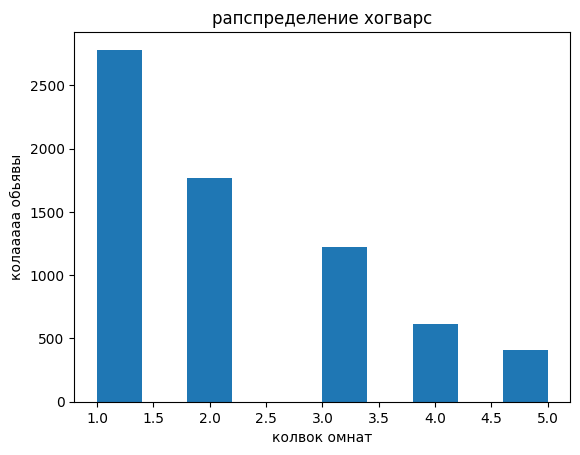

In [53]:
plt.hist(df['rooms_count'])
plt.xlabel('колвок омнат')
plt.ylabel('колааааа обьявы')
plt.title('рапспределение хогварс')
plt.show()

C:\Users\Евгений\AppData\Local\Temp\ipykernel_10124\1315723472.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(labels = df['location'].value_counts().index, rotation = 90)


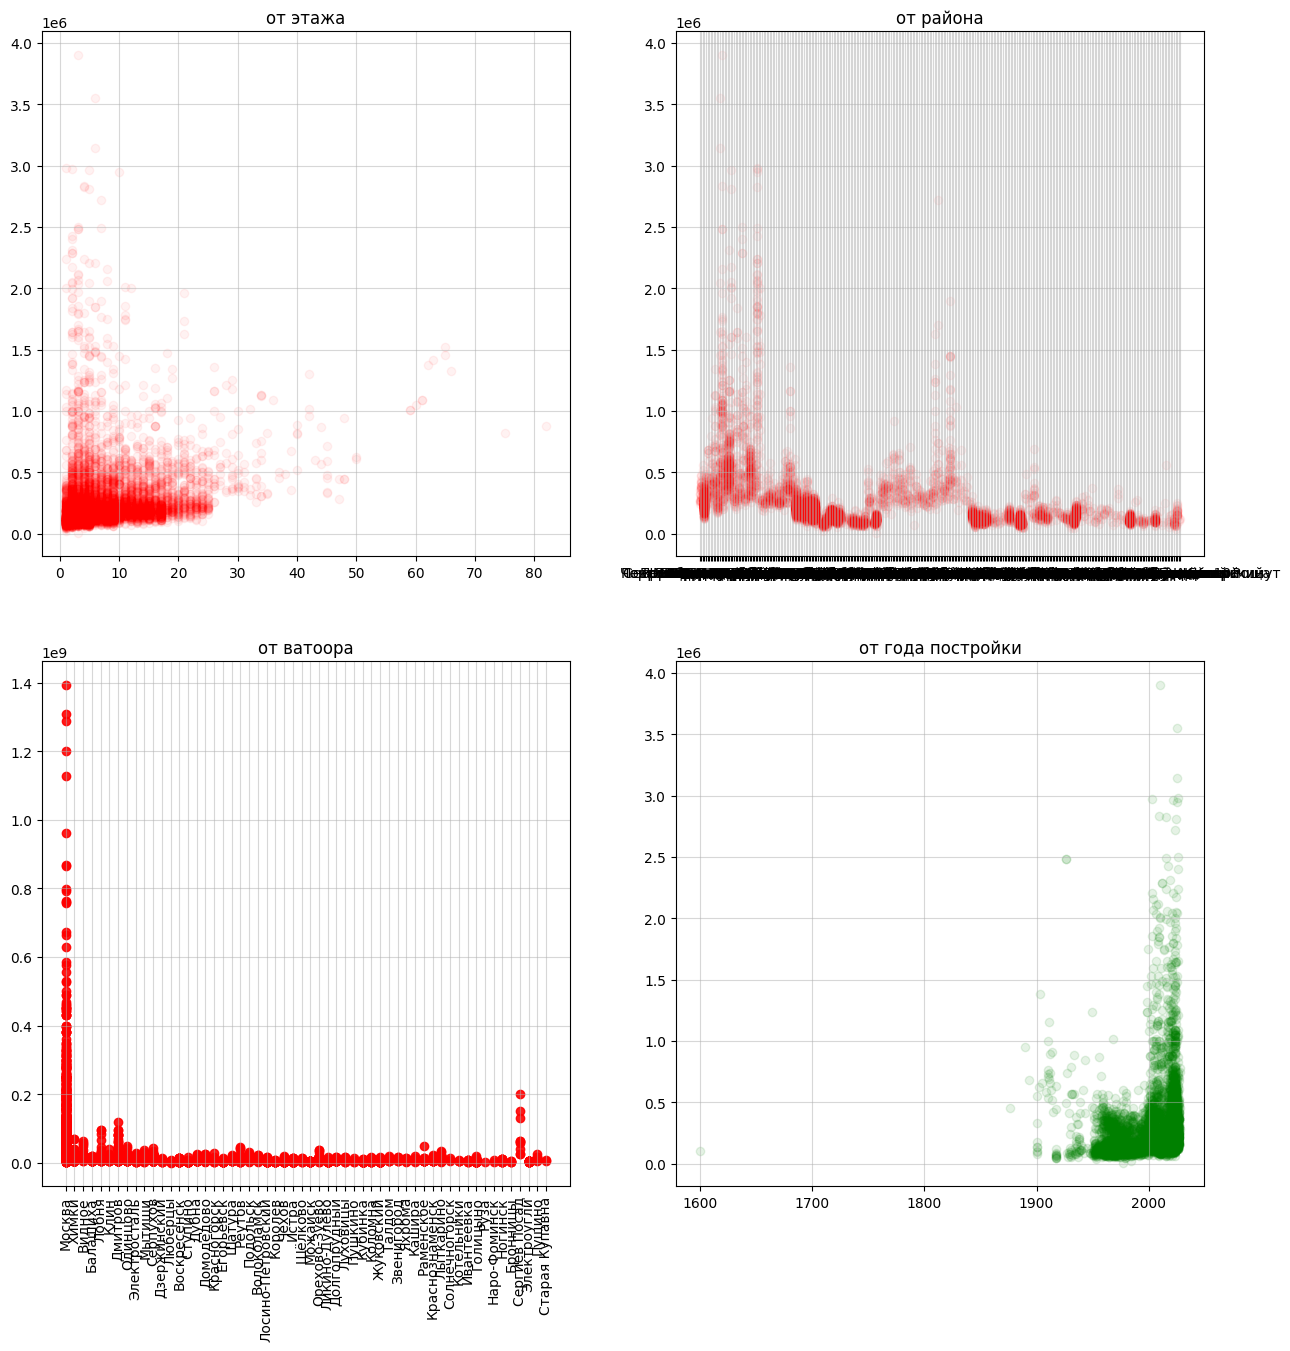

In [54]:
fig, axs = plt.subplots(2,2, figsize = (15, 15))
axs[0,0].scatter(y = df['price_per_meter'], x = df['floor'], alpha=0.05, color = 'red')
axs[0,0].grid(True, alpha = 0.5)
axs[0,0].set_title('от этажа')

axs[1,1].scatter(y = df['price_per_meter'], x = df['year_of_construction'], alpha=0.1, color = 'green')
axs[1,1].grid(True, alpha = 0.5)
axs[1,1].set_title('от года постройки')

axs[0,1].scatter(y = df['price_per_meter'], x = df['district'], alpha=0.05, color = 'red')
axs[0,1].grid(True, alpha = 0.5)
axs[0,1].set_title('от района')

axs[1,0].scatter(y = df['price'], x = df['location'], alpha=0.9, color = 'red')
axs[1,0].grid(True, alpha = 0.5)
axs[1,0].set_xticklabels(labels = df['location'].value_counts().index, rotation = 90)
axs[1,0].set_title('от ватоора')
plt.show()

In [55]:
df[df['location'] == 'Голицыно'].value_counts()

location  floor  floors_count  rooms_count  total_meters  price      year_of_construction  living_meters  kitchen_meters  district       underground      price_per_meter
Голицыно  2      6             3            133.60        65000000   2003                  66.2           18.2            Крылатское     Крылатское       486526             1
          3      6             3            84.60         59900000   1910                  72.9           11.7            Пресненский    Маяковская       708037             1
          4      5             1            47.00         41600000   2021                  13.0           16.0            Замоскворечье  Новокузнецкая    885106             1
                 8             5            117.00        58500000   1939                  107.0          10.0            Пресненский    Маяковская       500000             1
          5      5             5            250.00        130000000  1914                  200.0          30.0            Пресненс

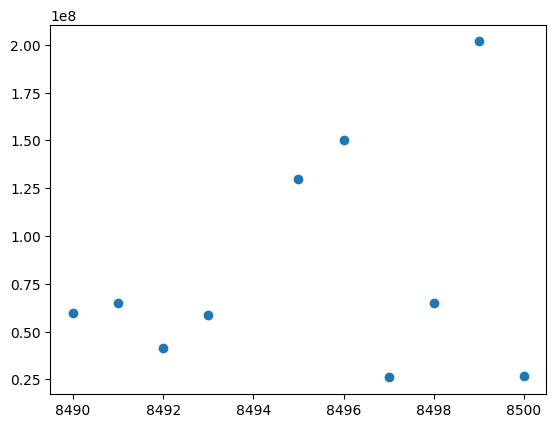

In [56]:
plt.scatter(df[df['location'] == 'Голицыно'].index, y=df[df['location'] == 'Голицыно']['price'])
plt.show()

In [57]:
df = df.drop(df[df['location'] == 'Голицыно'].index)
df[df['location'] == 'Голицыно']

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,underground,price_per_meter


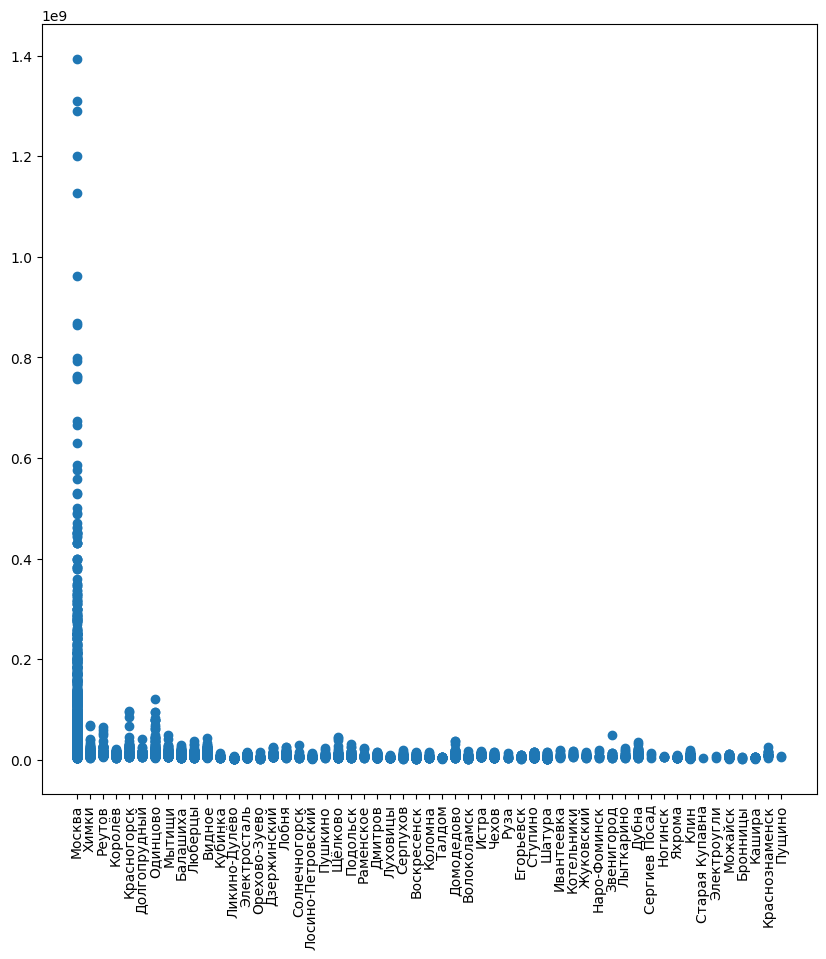

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['location'], y=df['price'])
plt.xticks(rotation = 90)
plt.show()

In [59]:
# нам нужно перекодировать author_type и location в числовые значения, для дальнейшей работы
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}

    for column in result.columns:
        if result.dtypes[column] == object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, column

# %%
encoded_df, encoders = number_encode_features(df)
print(encoders)
encoded_df.head()

price_per_meter


,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,underground,price_per_meter
0,30,5,7,1,34.6,9000000,1978,18.0,8.0,173,361,260115
1,30,14,45,1,41.3,12800000,2026,20.0,11.0,130,186,309927
2,30,10,12,1,34.4,19372498,2026,11.8,11.7,155,244,563154
6,30,13,17,1,37.6,11000000,2018,17.6,15.0,119,20,292553
8,30,9,28,1,34.7,14500000,2023,9.1,14.2,17,37,417867


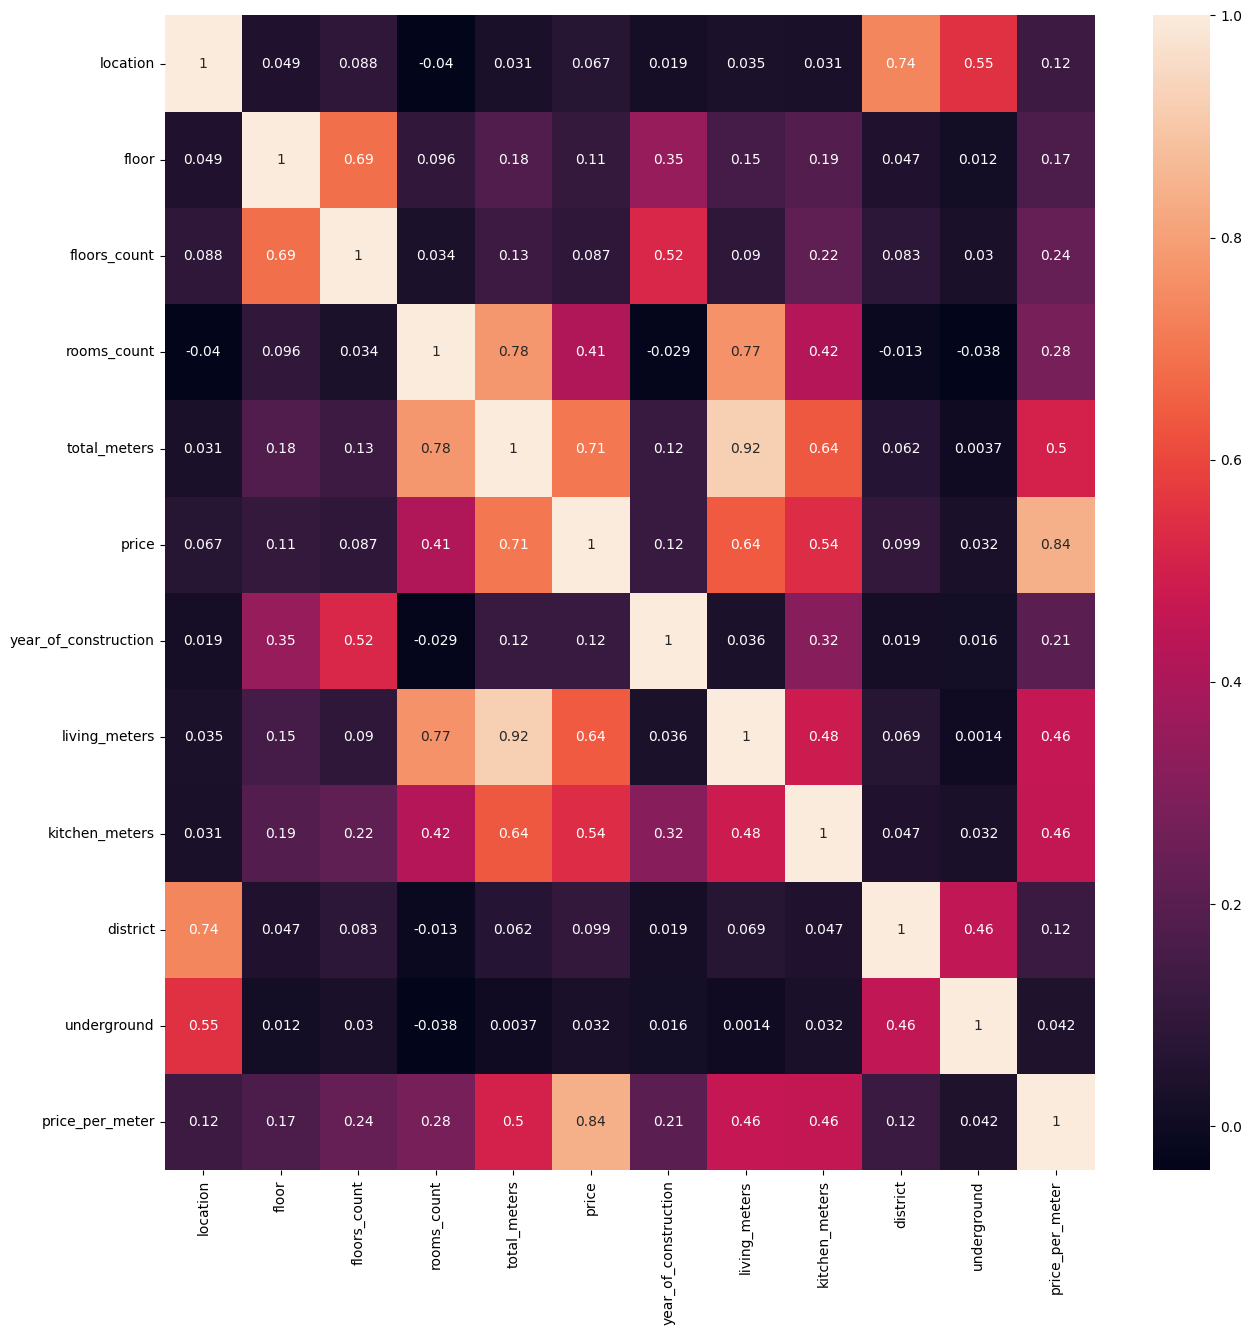

In [60]:
corr_mat = encoded_df.corr()
plt.figure(figsize=[15, 15])
sns.heatmap(corr_mat, annot=True)
plt.show()

fffffffffffffff